In [1]:
#import relevant libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime as dt

In [2]:

#load data
df = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')

In [3]:
#glance
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
#CustomerID is key to our analysis so drop rows where CustomerID is missing
df = df[pd.notnull(df['CustomerID'])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [23]:
#remove returned sales
actual_df = df[(df['Quantity']>0)]

In [24]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [25]:
#create sales amount column
actual_df['Amount'] = actual_df['Quantity']*actual_df['UnitPrice']

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
actual_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


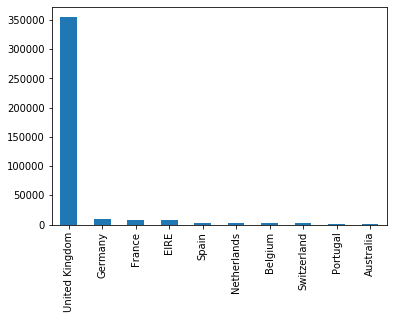

In [27]:
#visualize top 10 countries by transactions
actual_df['Country'].value_counts()[:10].plot(kind='bar')

In [92]:
#Filter the required columns
data = actual_df[['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Amount']]

In [93]:
#Convert InvoiceDate to datetime and then extract date only
data['InvoiceDate'] = (pd.to_datetime(data['InvoiceDate'])).dt.date

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
data.head()

,CustomerID,InvoiceDate,InvoiceNo,Amount
0,17850.0,2010-12-01,536365,15.30
1,17850.0,2010-12-01,536365,20.34
2,17850.0,2010-12-01,536365,22.00
3,17850.0,2010-12-01,536365,20.34
4,17850.0,2010-12-01,536365,20.34


In [95]:
#check earliest and latest purchase
data['InvoiceDate'].max(), data['InvoiceDate'].min()

(datetime.date(2011, 12, 9), datetime.date(2010, 12, 1))

In [96]:
Present = dt.date(2011,12,10)
print(Present)

2011-12-10


In [97]:
#rfm analysis
data['DaysElapsed'] = Present-data['InvoiceDate']

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
data.head()

,CustomerID,InvoiceDate,InvoiceNo,Amount,DaysElapsed
0,17850.0,2010-12-01,536365,15.30,374 days
1,17850.0,2010-12-01,536365,20.34,374 days
2,17850.0,2010-12-01,536365,22.00,374 days
3,17850.0,2010-12-01,536365,20.34,374 days
4,17850.0,2010-12-01,536365,20.34,374 days


In [102]:
data.tail()

,CustomerID,InvoiceDate,InvoiceNo,Amount,DaysElapsed
541904,12680.0,2011-12-09,581587,10.20,1 days
541905,12680.0,2011-12-09,581587,12.60,1 days
541906,12680.0,2011-12-09,581587,16.60,1 days
541907,12680.0,2011-12-09,581587,16.60,1 days
541908,12680.0,2011-12-09,581587,14.85,1 days


# rfm analysis

In [108]:
rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (Present - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Amount': lambda price: price.sum()})

In [109]:
rfm.head()

,InvoiceDate,InvoiceNo,Amount
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [111]:
#change column names
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [112]:
#check data types
rfm.dtypes

Recency        int64
Frequency      int64
Monetary     float64
dtype: object

In [116]:
#compute quantiles
rfm['r_qtile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_qtile'] = pd.qcut(rfm['Frequency'], 4, ['4','3', '2', '1'])
rfm['m_qtile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])

In [118]:
rfm.head()

,Recency,Frequency,Monetary,r_qtile,f_qtile,m_qtile
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12347.0,3,182,4310.00,1,1,1
12348.0,76,31,1797.24,3,3,1
12349.0,19,73,1757.55,2,2,1
12350.0,311,17,334.40,4,4,3


In [120]:
#check dtype of the quartile columns
rfm['r_qtile'].dtype

CategoricalDtype(categories=['1', '2', '3', '4'], ordered=True)

In [122]:
#combine all quartile columns to form rfm_score
rfm['rfm_score'] = rfm['r_qtile'].astype(str)+rfm['f_qtile'].astype(str)+rfm['m_qtile'].astype(str)

In [123]:
rfm.head()

,Recency,Frequency,Monetary,r_qtile,f_qtile,m_qtile,rfm_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,4,4,1,441
12347.0,3,182,4310.00,1,1,1,111
12348.0,76,31,1797.24,3,3,1,331
12349.0,19,73,1757.55,2,2,1,221
12350.0,311,17,334.40,4,4,3,443


In [129]:
#Sort and filter top customers based on amount spent
rfm[rfm['rfm_score']=='111'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,r_qtile,f_qtile,m_qtile,rfm_score
CustomerID,,,,,,,
14646.0,2,2080,280206.02,1,1,1,111
18102.0,1,431,259657.30,1,1,1,111
17450.0,9,337,194550.79,1,1,1,111
14911.0,2,5677,143825.06,1,1,1,111
14156.0,10,1400,117379.63,1,1,1,111
